In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.animation as animation
from mpl_toolkits import mplot3d
import math

In [2]:
def spher2cart(r, theta, phi):
    return [
         r * math.sin(theta) * math.cos(phi),
         r * math.sin(theta) * math.sin(phi),
         r * math.cos(theta)
    ]

def randPhi():
    return math.radians(np.random.randint(0,361))

def randTheta():
    return math.radians(np.random.randint(0,181))

mice have ~58.5ml/kg of blood/kg of body weight

origami delivered at 0.08mg/kg

0.08/58.5=0.0014mg/ml of origami/ml of blood

scaffold of 7249nt corresponds to 4 403 200.5g/mol

(ThermoFisher: M.W. of dsDNA = (# nucleotides x 607.4) + 157.9)

which leads to 318pM


RNase in blood is 0.11ug/ml

RNase A is ~13.7kDa

leads to 8.03nM of RNase


suppose 1L box = 10^24nm^3

V of RNase is ~113.1nm^3, therefore radius of 3nm

8.03nM of RNase * 6.023x10^23 = 4.84x10^15 molecules of RNase in 1L

DNA origami is 80nm side length, 512 000nm^3

0.31nM of origami equates to 1.87x10^14 molecules of origami in 1L

Unoccupied V = 10^24nm^3 - 5.47x10^17nm^3 - 9.57x10^19nm^3 = ~10^24nm^3

Average distance between origami and nuclease (10^24)^(1/3) = 0.1m = 10 000 000nm


Using Stokes-Einstein, D = 2.16x10^-11 m^2/s

Using RMS = sqrt(3RT/M), RMS = 23.8 m/s

Using I = 6D/RMS = 5.45x10^-12 m

t = I^2/(6D) = 2.29x10^-13 s

In [3]:
def brownianMotion(maxTime, distanceDiff):
    
    #nuclease starting point in nm
    path = np.array([40+distanceDiff,0,0])
    
    #start time
    t = 0
    
    #timestep
    timeStep = 2.29*10**(-13)
    
    counter = 0
    
    #mean distance
    distance = 0.00545
    
    #for computational limit purposes, use these variables timestep
    #timeStep = 0.05
    
    #for t in range(len(timePoints)-1):
    while (t < maxTime):
        
        randomTraj = spher2cart(distance, randTheta(), randPhi())
        
        #randomNumberArray = np.array([[random.gauss(0, timeStep),random.gauss(0, timeStep),
        #                             random.gauss(0, timeStep)]])
        
        path = np.vstack((path, path + randomTraj))
        counter += 1

        #check if molecule collides with box
        #box is centered at (0,0,0), with 80nm side length
        currentPosition = path[counter]
        if currentPosition[0]<=40 and currentPosition[0]>=-40:
            if currentPosition[1]<=40 and currentPosition[1]>=-40:
                if currentPosition[2]<=40 and currentPosition[2]>=-40:
                    #print('BOX HIT after ')
                    #print(t)
                    return t
                
        t = t + timeStep
    
    #print(path)
    #print('no hit after ' + str(maxTime))
    return maxTime

In [36]:
brownianMotion(27*2.29*10**(-13), 0.01)

6.183e-12

In [20]:
results = []

#set variables
maxTime = 27*2.29*10**(-13) #in s
distanceDiff = 0.006 #in nm

for i in range(200):
    results.append(brownianMotion(maxTime, distanceDiff))
    
#print(results)

Text(0, 0.5, 'Probability')

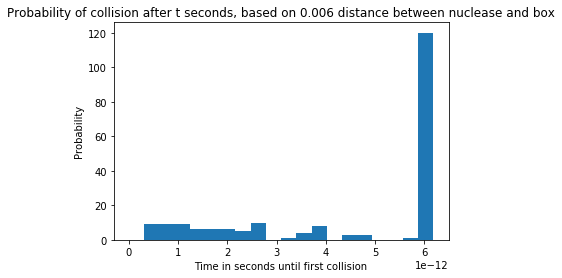

In [22]:
plt.hist(results, density=False, bins=20, range=[0,27*2.29*10**(-13)])
title = 'Probability of collision after t seconds, based on ' + str(distanceDiff) + ' distance between nuclease and box'
plt.title(title)
plt.xlabel('Time in seconds until first collision')
plt.ylabel('Probability')

In [ ]:
timeSteps = 1000
duration = 10
timePoints = [0]

for t in range(timeSteps):
    timePoints.append(timePoints[t] + (duration / timeSteps))

brownianMotion(timePoints)

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

#ax.plot3D(Xs, Ys, Zs, 'red')


In [ ]:
timeSteps = 400 #number of steps taken
stepSize=0.05 #size of each step
Xs=np.zeros(timeSteps+1) #array of x values
Ys=np.zeros(timeSteps+1) #array of y values

Xs[0] = 0 #initial x
Ys[0] = 0 #initial y
theta = 0 #initial theta

# we've defined this function that might be helpful for you - be careful of units!
def ang_to_vec(theta):
    return np.cos(theta), np.sin(theta)

# Simulate 2-D diffusion below. Your bacteria should select a random direction, then take a "step" in that direction.
# Repeat for the total number of steps. Plot the trajectory of your bacteria over time (any reasonable visualization is fine)

for i in range(timeSteps):
    direction = np.random.randint(0,361) #select random direction
    uvector = ang_to_vec(np.radians(direction)) #convert direction to unit vector
    svector = [stepSize*u for u in uvector] #multiply unit vector by stepSize
    Xs[i+1] = Xs[i] + svector[0] 
    Ys[i+1] = Ys[i] + svector[1]

plt.plot(Xs, Ys)

#select random direction
#convert direction to unit vector
#multiply unit vector by stepSize
#find x and y value of new location by adding to previous location
#append x/y value to Xs and Ys
